In [1]:
from KP import KnapsackProblem
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Plot Example
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

## Value of objects as function of temperature

We plot  

\begin{align}
V = \sum_{\ell=1}^N v_{\ell} X_{\ell}, 
\end{align}

as a function of temperature, where 

\begin{equation}
X_{\ell} = \begin{cases} 1 & \text{if $\langle x_{\ell} \rangle>1/2$,} \\[.75em] 0 & \text{otherwise.}\end{cases}
\end{equation}

and where

\begin{equation}
\langle x_{\ell} \rangle  = \frac{ e^{\beta v_\ell}}{z_0^{-w_\ell} +e^{\beta v_\ell}},
\label{eq:xellsoln}
\end{equation}

with $z_0$ defined as the value of $z$ at which $F_N(z; \{\beta v_k\}, \{w_k\})$ is at a local minimum. 

----

#### Weight, Value, and Limit

In [13]:
## Weight and Value Parameters; randomly selected

# set seed
np.random.seed(42) 

# number of objects
nelems = 100

# Randomly choose the value and weight of each object
weight_vec = np.random.randint(1,10,nelems)
value_vec = np.random.randint(1,10,nelems)

# Defining Weight limit as the average 
# of the weights of randomly chosen objects
empt_list = []
for k in range(100):
    empt_list.append(np.dot(np.random.randint(0,2,nelems), weight_vec))
Wlimit = int(np.mean(empt_list))

# defining knapsack instance
KP_init = KnapsackProblem(weights = weight_vec, values = value_vec, limit = Wlimit)

In [37]:
Wlimit

264

In [15]:
KP_init.largeN_algorithm(T = 0.5, ceiling = False)

array([1.24101322e-02, 9.83216386e-01, 2.84555452e-03, 4.44302316e-03,
       4.06909971e-01, 9.99929004e-01, 9.73998252e-01, 9.97851538e-01,
       1.95923944e-01, 9.99687448e-01, 5.22641455e-05, 2.06505270e-02,
       9.72153857e-01, 7.51315233e-01, 9.98625147e-01, 9.99983876e-01,
       2.06505270e-02, 9.93974070e-01, 9.54139822e-01, 9.89929593e-01,
       9.25366923e-01, 9.99888974e-01, 3.41732540e-02, 9.99972945e-01,
       9.72153857e-01, 9.73998252e-01, 9.99994274e-01, 6.58914100e-01,
       7.96449864e-02, 4.44302316e-03, 9.99998700e-01, 9.99511287e-01,
       6.42913624e-01, 9.90607983e-01, 1.24101322e-02, 9.99983876e-01,
       9.97695136e-01, 9.34530436e-01, 9.99999705e-01, 3.41732540e-02,
       4.44302316e-03, 9.54139822e-01, 9.99957689e-01, 8.35242273e-01,
       9.84339855e-01, 9.99998700e-01, 9.98524978e-01, 1.92732859e-02,
       2.75920797e-01, 2.06505270e-02, 9.99687448e-01, 7.37925310e-01,
       5.24330348e-02, 1.01245849e-03, 9.83216386e-01, 1.01245849e-03,
      

In [16]:
Wavg = np.dot(KP_init.largeN_algorithm(T = 0.25, ceiling = False), weight_vec)
(Wlimit - Wavg)/(1 + Wlimit - Wavg)

0.05014550865596754

In [17]:
np.dot(KP_init.largeN_algorithm(T = 0.25, ceiling = False), weight_vec)

263.9472071679263

#### Computing solution for each temperature

In [21]:
Tvals = np.linspace(.001, 2.0, 500)
total_value_list = list()
z_vals = list()
total_weight_list = list()

for Tval in Tvals: 
    soln = KP_init.largeN_algorithm(T = Tval, ceiling = False)
    total_value_list.append(np.dot(soln, value_vec))
    total_weight_list.append(np.dot(soln, weight_vec))

    Wavg = np.dot(KP_init.largeN_algorithm(T = Tval, ceiling = False), weight_vec)
    print(Tval)
    print((Wlimit - Wavg)/(1 + Wlimit - Wavg) )
    z_vals.append((Wlimit - Wavg)/(1 + Wlimit - Wavg) )
    print()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/mobolajiwilliams/Dropbox/0Tex_Files_Mac/ipython_personal/2020_11_largeN_knapsack/largeNKP/KP.py:157: RuntimeWarning: overflow encountered in exp
  xvec[k] = np.exp(self.values[k]/T)/(z**(-self.weights[k]) + np.exp(self.values[k]/T))
/Users/mobolajiwilliams/Dropbox/0Tex_Files_Mac/ipython_personal/2020_11_largeN_knapsack/largeNKP/KP.py:157: RuntimeWarning: invalid value encountered in double_scalars
  xvec[k] = np.exp(self.values[k]/T)/(z**(-self.weights[k]) + np.exp(self.values[k]/T))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Ja

0.001
nan

0.005006012024048097
nan

0.009012024048096194
nan

0.01301803607214429
1.00374531835206

0.017024048096192387
1.00374531835206

0.021030060120240484
1.00374531835206

0.02503607214428858
1.00374531835206

0.029042084168336677
1.00374531835206

0.033048096192384774
1.00374531835206

0.037054108216432874
1.00374531835206

0.04106012024048097
1.00374531835206

0.04506613226452906
1.00374531835206

0.04907214428857716
1.00374531835206

0.05307815631262526
1.003745318357675

0.057084168336673353
-3.404631679554035e-06

0.06109018036072145
1.0037453184185032

0.06509619238476955
1.003745318534006

0.06910220440881765
1.1848980743987447

0.07310821643286575
-0.010294803081514106

0.07711422845691383
-0.05577799301643258

0.08112024048096193
-0.08355746421068351

0.08512625250501003
-0.019595687599674772

0.08913226452905812
-0.0403306362199433

0.09313827655310622
-0.002020959148431689

0.09714428857715432
0.0004025401028689202

0.10115030060120242
0.0005507531437157358

0.1051563

0.9103647294589179
0.4422011089956141

0.914370741482966
0.4437637286139103

0.9183767535070141
0.44531803320731345

0.9223827655310622
0.44686407981281334

0.9263887775551103
0.4484019251238598

0.9303947895791584
0.4499316255009071

0.9344008016032065
0.45145323695311446

0.9384068136272546
0.4529668151457075

0.9424128256513027
0.45447241539635935

0.9464188376753508
0.4559700926736117

0.9504248496993989
0.4574599015953518

0.954430861723447
0.4589418964278601

0.9584368737474951
0.46041613108487794

0.9624428857715431
0.46188265912648124

0.9664488977955913
0.4633415337587172

0.9704549098196393
0.4647928078328367

0.9744609218436875
0.4662365338451418

0.9784669338677355
0.4676727639365553

0.9824729458917837
0.4691015498925011

0.9864789579158317
0.4705229431430507

0.9904849699398799
0.47193699476280493

0.9944909819639279
0.47334375547151175

0.9984969939879761
0.47474327563390606

1.0025030060120241
0.4761356052605292

1.006509018036072
0.4775207940081133

1.0105150300601202


(0.0, 2.0)

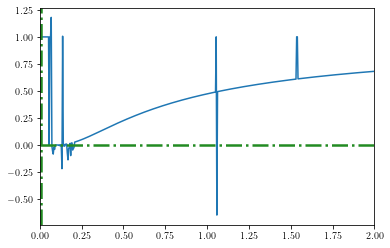

In [24]:
plt.plot(Tvals, z_vals)
plt.axhline(y = 0, color = 'forestgreen', linestyle = 'dashdot',linewidth = 2.5)   
plt.axvline(x = 1/nelems, color = 'forestgreen', linestyle = 'dashdot',linewidth = 2.5)   
plt.xlim(0,2)

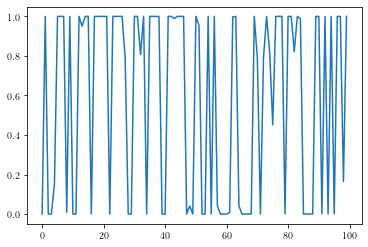

In [35]:
plt.plot(np.exp(value_vec/Tvals[40])*z_vals[40]**(weight_vec)/(1+np.exp(value_vec/Tvals[40])*z_vals[40]**(weight_vec)))

In [36]:
np.sum(weight_vec)

532

In [25]:
1/nelems

0.01

#### Plotting Value

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


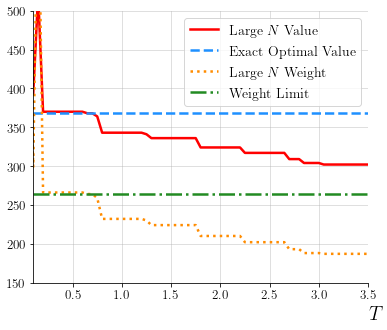

In [4]:
# figure
plt.figure(figsize = (6, 5))
ax = plt.subplot(111)

#plots of values
plt.plot(Tvals, total_value_list, color = 'red', label = r'Large $N$ Value', linewidth = 2.5)
soln_dp = KP_init.knapsack01_dpV()
plt.axhline(y = np.dot(soln_dp, value_vec), color = 'dodgerblue', linestyle = '--', label = 'Exact Optimal Value', linewidth = 2.5)
    
# plots of weights
plt.plot(Tvals, total_weight_list, color = 'darkorange', linestyle = 'dotted', label = r'Large $N$ Weight', linewidth = 2.5)
plt.axhline(y = Wlimit, color = 'forestgreen', linestyle = 'dashdot', label = 'Weight Limit', linewidth = 2.5)    
    
# plot formatting
plt.xlabel(r'$T$', fontsize = 20, x = 1.02)
plt.ylabel(r'', fontsize = 18, rotation = 0,y = 1.05)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.ylim([150, 500])
plt.xlim([.1, 3.5])
plt.legend(loc = 'best', fontsize = 14)
plt.grid(alpha = 0.5)

plt.show()


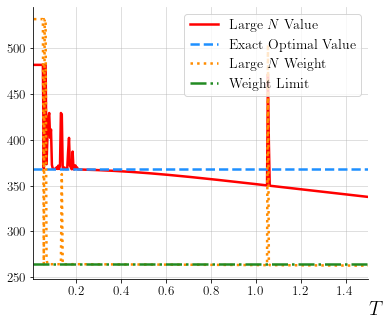

In [27]:
# figure
plt.figure(figsize = (6, 5))
ax = plt.subplot(111)

#plots of values
plt.plot(Tvals, total_value_list, color = 'red', label = r'Large $N$ Value', linewidth = 2.5)
soln_dp = KP_init.knapsack01_dpV()
plt.axhline(y = np.dot(soln_dp, value_vec), color = 'dodgerblue', linestyle = '--', label = 'Exact Optimal Value', linewidth = 2.5)
    
# plots of weights
plt.plot(Tvals, total_weight_list, color = 'darkorange', linestyle = 'dotted', label = r'Large $N$ Weight', linewidth = 2.5)
plt.axhline(y = Wlimit, color = 'forestgreen', linestyle = 'dashdot', label = 'Weight Limit', linewidth = 2.5)    
    
# plot formatting
plt.xlabel(r'$T$', fontsize = 20, x = 1.02)
plt.ylabel(r'', fontsize = 18, rotation = 0,y = 1.05)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
# plt.ylim([740, 760])
plt.xlim([.01, 1.5])
plt.legend(loc = 'best', fontsize = 14)
plt.grid(alpha = 0.5)

plt.show()
